In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
x = tf.linspace(-2, 2, 784)
x = tf.cast(x, tf.float32)

def f(x): 
    return x**2 + 2*x - 5

y = f(x) + tf.random.normal(shape=[784], mean=0, stddev=1)

In [5]:
# Fijo la cantidad de entradas (es aconsejable)
# El tamaño del lote siempre se omite, ya que solo se especifica la forma de cada muestra.
inputs = keras.Input(shape=(784,))
print(inputs.shape)
print(inputs.dtype)

(None, 784)
<dtype: 'float32'>


In [6]:
# Creo neuronas
dense = layers.Dense(64, activation="relu")
# Conecto capas
x = dense(inputs)

In [7]:
# Agrego y conecto 2 capas más
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [8]:
# Creo el modelo
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


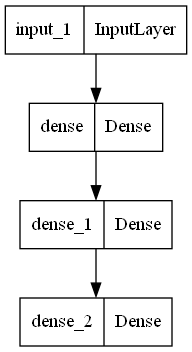

In [9]:
# winget install graphviz (poner variable de entorno con C:\Program Files\Graphviz\bin)
# pip install graphviz
# pip install pydot
keras.utils.plot_model(model, "my_first_model.png")

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [11]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

In [12]:
history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

Epoch 1/2
750/750 [==============================] - 1s 1ms/step - loss: 0.3452 - accuracy: 0.9026 - val_loss: 0.1996 - val_accuracy: 0.9399
Epoch 2/2
750/750 [==============================] - 1s 1ms/step - loss: 0.1607 - accuracy: 0.9517 - val_loss: 0.1361 - val_accuracy: 0.9613


In [14]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 0.1335 - accuracy: 0.9594 - 200ms/epoch - 639us/step
Test loss: 0.13352221250534058
Test accuracy: 0.9593999981880188
